In [11]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# Defining Data Frame 
df = pd.read_csv("dataset.csv")  # Replace with actual dataset path


In [15]:
# Defining Function
def classify_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6:
        return "Happy"
    elif row['valence'] < 0.4 and row['energy'] < 0.4:
        return "Sad"
    elif row['energy'] > 0.7 and row['danceability'] > 0.6:
        return "Energetic"
    else:
        return "Calm"

In [17]:
df['mood'] = df.apply(classify_mood, axis=1)


In [19]:
label_encoder = LabelEncoder()
df['mood'] = label_encoder.fit_transform(df['mood'])

In [21]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
X = df[features]
y = df['mood']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 1.00
              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00     12228
   Energetic       1.00      1.00      1.00      1998
       Happy       1.00      1.00      1.00      5773
         Sad       1.00      1.00      1.00      2801

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800



In [33]:
def classify_song(features):
    features = np.array(features).reshape(1, -1)
    features = scaler.transform(features)
    mood_index = model.predict(features)[0]
    return label_encoder.inverse_transform([mood_index])[0]


In [35]:
new_song_features = [0.8, 0.7, 0.6, 120, 0.1, 0.0, 0.2, 0.05]
print("Predicted Mood:", classify_song(new_song_features))


Predicted Mood: Calm


C:\Users\manas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


C:\Users\manas\AppData\Local\Temp\ipykernel_10844\3851498822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['mood'], palette='viridis')


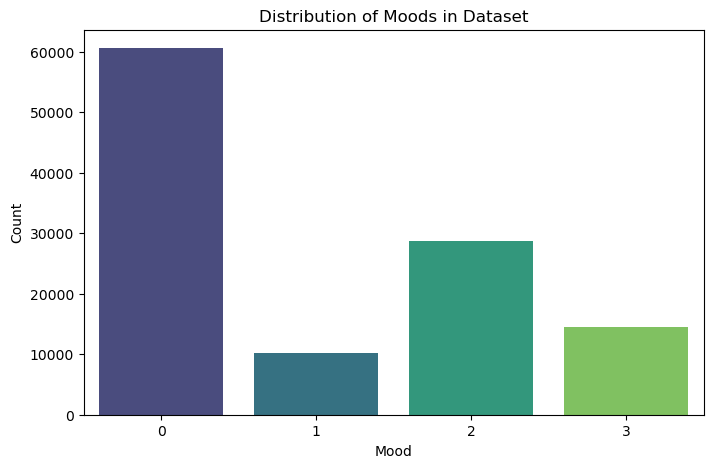

In [37]:
# Univarient Analysis 
# Visualizing Data for Mood Column
plt.figure(figsize=(8, 5))
sns.countplot(x=df['mood'], palette='viridis')
plt.title("Distribution of Moods in Dataset")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.show()

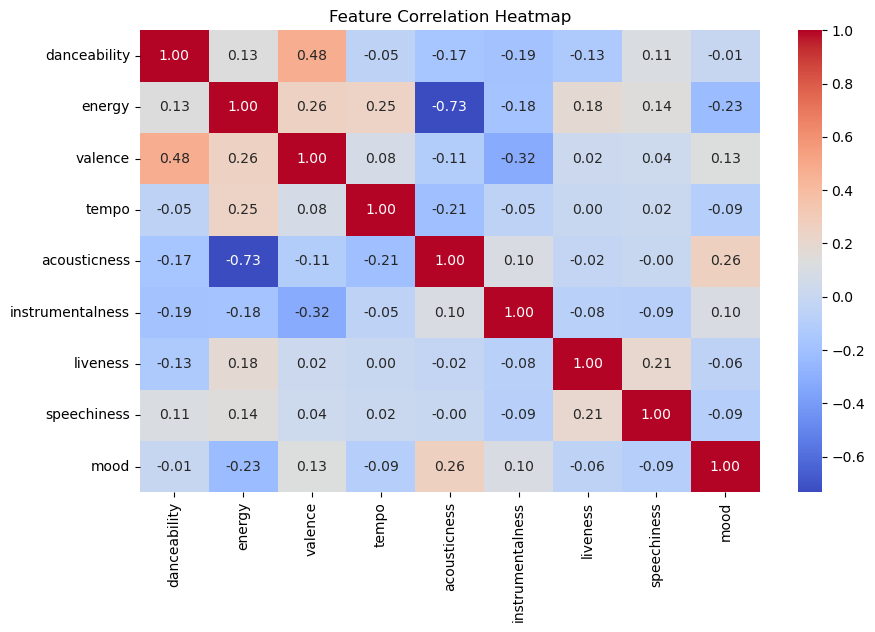

In [39]:
# Correlation Plot 
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + ['mood']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\manas\AppData\Local\Temp\ipykernel_10844\2367801671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='magma')


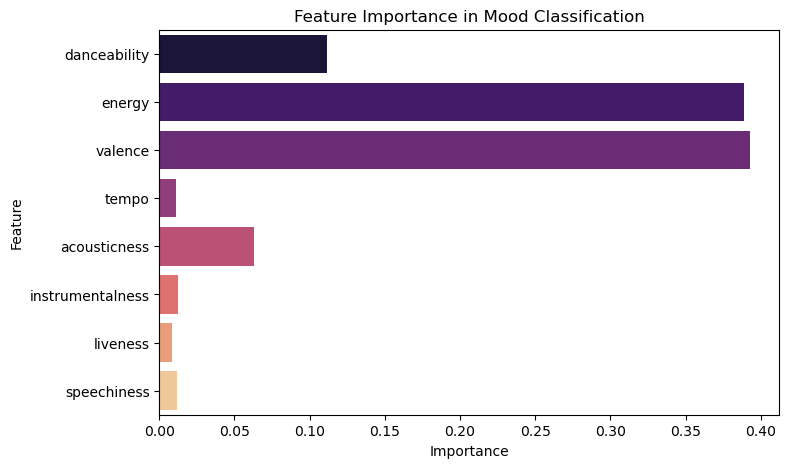

In [41]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='magma')
plt.title("Feature Importance in Mood Classification")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()